# Análise da Ocorrência de CATs por UF:

In [1]:
#retirar as que não forem usadas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
arquivoUFSomaTotal = 'datasets/result/dados_uf_soma_top.csv'  
#colunas: uf | qtde  

columns_types = {'uf': str, 'qtde': int}
nomes  = ['uf', 'qtde']

dados_uf = pd.read_csv(arquivoUFSomaTotal, sep = ';', header=0, names=nomes, dtype=columns_types, encoding='utf-8')
df_uf = pd.DataFrame(data = dados_uf, columns=nomes)
df_uf.head()

,uf,qtde
0,São Paulo,7512150
1,Minas Gerais,1997759
2,Rio Grande do Sul,1605903
3,Paraná,1350025
4,Rio de Janeiro,1259574


In [3]:
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   uf      5 non-null      object
 1   qtde    5 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 188.0+ bytes


In [4]:
df_uf.describe()

,qtde
count,5.000000e+00
mean,2.745082e+06
std,2.680209e+06
min,1.259574e+06
25%,1.350025e+06
50%,1.605903e+06
75%,1.997759e+06
max,7.512150e+06


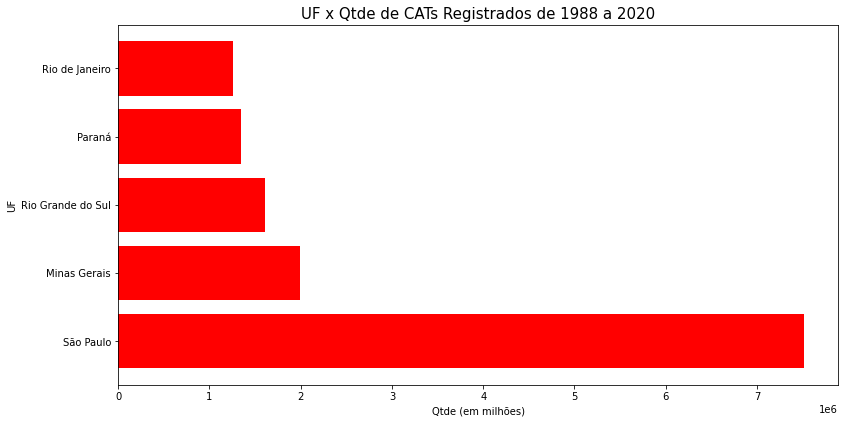

In [5]:
# Criando um gráfico de barras:
fig = plt.figure(figsize = (10,5))
graf_uf = fig.add_axes([0,0,1,1])
graf_uf.barh(df_uf['uf'], df_uf['qtde'], color='red')
graf_uf.set_title('UF x Qtde de CATs Registrados de 1988 a 2020', fontsize=15)
graf_uf.set_ylabel("UF")
graf_uf.set_xlabel("Qtde (em milhões)")

plt.show()

# Análise dos Dados do RJ:

In [6]:
arquivoUFAnoTop = 'datasets/result/dados_uf_ano_soma_top.csv'  
#colunas: uf | ano |qtde  

columns_types = {'uf': str, 'ano': int, 'qtde': int}
nomes  = ['uf', 'ano', 'qtde']

dados_uf_ano = pd.read_csv(arquivoUFAnoTop, sep = ';', header=0, names=nomes, dtype=columns_types, encoding='utf-8')
df_uf_ano = pd.DataFrame(data = dados_uf_ano, columns=nomes)
df_uf_ano.index.name='id'
df_uf_ano.head()

,uf,ano,qtde
id,,,
0,Minas Gerais,1988,95802
1,Minas Gerais,1989,89049
2,Minas Gerais,1990,67619
3,Minas Gerais,1991,65891
4,Minas Gerais,1992,57695


In [7]:
df_uf_ano.describe()

,ano,qtde
count,165.000000,165.000000
mean,2004.000000,83184.309091
std,9.550891,81130.660349
min,1988.000000,0.000000
25%,1996.000000,37574.000000
50%,2004.000000,52111.000000
75%,2012.000000,77899.000000
max,2020.000000,446858.000000


Análise da UF de RJ:

In [8]:
condicao = df_uf_ano['uf'] == 'Rio de Janeiro'
df_selecao = df_uf_ano[condicao].copy()
print('Quantidade de registros para o Rio de Janeiro: {}'.format(df_selecao.shape[0]))
#deverá retornar 33, que é a quantidade de registros de RJ, um para cada ano


Quantidade de registros para o Rio de Janeiro: 33


In [9]:
df_selecao.head()

,uf,ano,qtde
id,,,
99,Rio de Janeiro,1988,96548
100,Rio de Janeiro,1989,77241
101,Rio de Janeiro,1990,57003
102,Rio de Janeiro,1991,37583
103,Rio de Janeiro,1992,20863


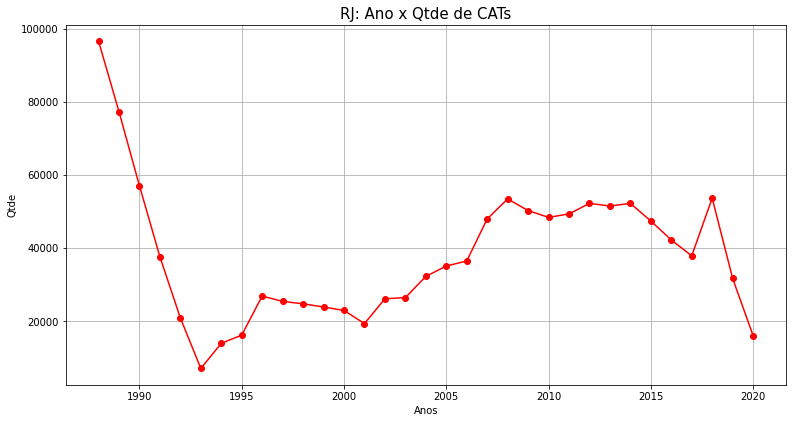

In [10]:
x = df_selecao['ano']
y = df_selecao['qtde']

fig = plt.figure(figsize=(10,5))
grafico_rj_ano = fig.add_axes([0, 0, 1, 1])
grafico_rj_ano.plot(x, y, color= 'red', marker = 'o')
grafico_rj_ano.set_title('RJ: Ano x Qtde de CATs',fontsize=15)
grafico_rj_ano.set_ylabel('Qtde')
grafico_rj_ano.set_xlabel('Anos')
grafico_rj_ano.grid(True)
plt.show()

<AxesSubplot:>

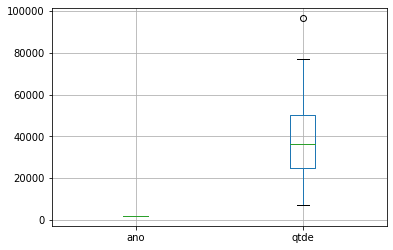

In [11]:
# Reprentação através de um gráfico bloxplot das quantidades de CATs registradas em RJ entre os anos de 1988 e 2020:
df_selecao.boxplot()

In [12]:
df_selecao.describe()

,ano,qtde
count,33.00000,33.000000
mean,2004.00000,38168.909091
std,9.66954,18848.138397
min,1988.00000,7057.000000
25%,1996.00000,24738.000000
50%,2004.00000,36439.000000
75%,2012.00000,50228.000000
max,2020.00000,96548.000000


Vamos analisar melhor, ano a ano, os dados dessas cinco primeiras UFs no ranking da quantidade de CATs, no período pesquisado (1988 a 2020):

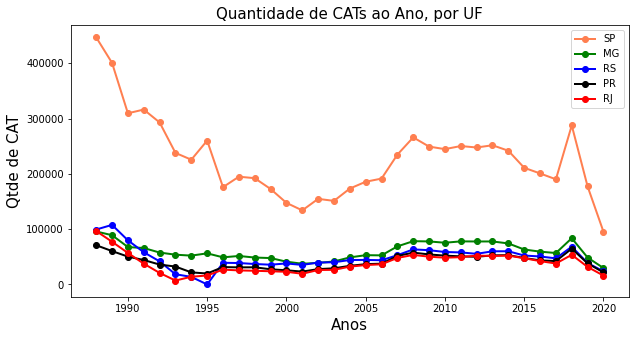

In [13]:
# Criando um gráfico com múltiplas linhas, para representar as 5 UFs com mais CATs de 1988 a 2020 e suas variações
# a partir de: df_uf_ano -> uf | ano | qtde

condicaoSP = df_uf_ano['uf'] == 'São Paulo'
df_selecaoSP = df_uf_ano[condicaoSP]
ySP = df_selecaoSP['qtde']

condicaoMG = df_uf_ano['uf'] == 'Minas Gerais'
df_selecaoMG = df_uf_ano[condicaoMG]
yMG = df_selecaoMG['qtde']

condicaoRS = df_uf_ano['uf'] == 'Rio Grande do Sul'
df_selecaoRS = df_uf_ano[condicaoRS]
yRS = df_selecaoRS['qtde']

condicaoPR = df_uf_ano['uf'] == 'Paraná'
df_selecaoPR = df_uf_ano[condicaoPR]
yPR = df_selecaoPR['qtde']

condicaoRJ = df_uf_ano['uf'] == 'Rio de Janeiro'
df_selecaoRJ = df_uf_ano[condicaoRJ]
yRJ = df_selecaoRJ['qtde']

df=pd.DataFrame({'x_values': df_uf_ano['ano'], 'SP': ySP, 'MG': yMG, 'RS': yRS, 'PR': yPR, 'RJ': yRJ})
plt.figure(figsize=(10,5))
plt.plot( 'x_values', 'SP', data=df, marker='o', color='coral', linewidth=2)
plt.plot( 'x_values', 'MG', data=df, marker='o', color='green', linewidth=2)
plt.plot( 'x_values', 'RS', data=df, marker='o', color='blue', linewidth=2)
plt.plot( 'x_values', 'PR', data=df, marker='o', color='black', linewidth=2)
plt.plot( 'x_values', 'RJ', data=df, marker='o', color='red', linewidth=2)

plt.title('Quantidade de CATs ao Ano, por UF',fontsize=15)
plt.xlabel('Anos',fontsize=15)
plt.ylabel('Qtde de CAT',fontsize=15)

#plt.legend()
plt.legend(['SP', 'MG', 'RS', 'PR', 'RJ'], prop={"size":10})

## Análise da Série Temporal da Quantidade de CATs em RJ:

In [14]:
#Primeiro, vamos dividir os registros em dois grupos: o de treinamento (80%) e o de teste (20%)
tamanho = df_selecaoRJ.shape[0]
print('Tamanho da base: {}'.format(tamanho))

Tamanho da base: 33


In [15]:
treinamento = math.floor(0.8*tamanho)
print('Tamanho da base para treinamento: {} registros'.format(treinamento))
teste = tamanho - treinamento
print('Tamanho da base para teste: {} registros'.format(teste))

Tamanho da base para treinamento: 26 registros
Tamanho da base para teste: 7 registros


In [16]:
# anos: de 1988 até 2013
df_selecaoRJ.index = range(df_selecao.shape[0])
df_treinamento = df_selecaoRJ.iloc[:treinamento, 1:].copy() 
df_teste = df_selecaoRJ.iloc[treinamento:, 1:].copy()

df_treinamento['anoStr'] = df_treinamento['ano'].apply(str)
df_treinamento['anoStr'] = df_treinamento['anoStr'].apply(lambda x: x + '1231')

df_treinamento.index = df_treinamento['anoStr']
df_treinamento.drop(['anoStr'], axis=1, inplace = True)
df_treinamento.drop(['ano'], axis=1, inplace = True)

df_treinamento.head(30)

,qtde
anoStr,
19881231,96548
19891231,77241
19901231,57003
19911231,37583
19921231,20863
19931231,7057
19941231,13920
19951231,16172
19961231,26858


<Figure size 1440x720 with 0 Axes>

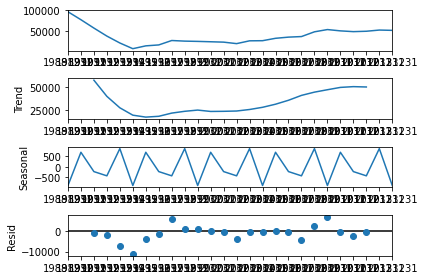

In [17]:
result = seasonal_decompose(df_treinamento, period=5)
plt.figure(figsize=(20,10))
imagem = result.plot()

In [18]:
result = adfuller(df_treinamento.qtde)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.613435
p-value: 0.005509
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


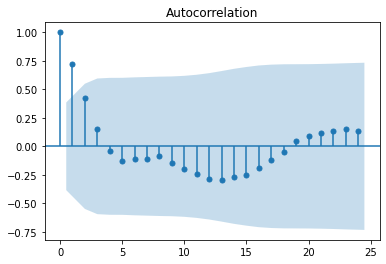

In [19]:
sm.graphics.tsa.plot_acf(df_treinamento.values.squeeze(), lags=24)
plt.show()

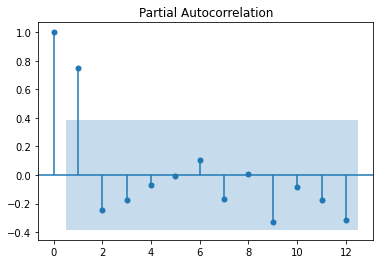

In [20]:
sm.graphics.tsa.plot_pacf(df_treinamento.values.squeeze(), lags=12)
plt.show()


In [21]:
df_treinamento.index = pd.to_datetime(df_treinamento.index, format='%Y%m%d')


In [22]:
# p = 1  (onde começa)
# como não precisamos aplicar a diferenciação, o valor de d = 0
# podemos usar q = 2 (moving average window)

model = ARIMA(df_treinamento, order=(1,0,1), freq=df_treinamento.index.inferred_freq)
 

c:\users\carolina\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [23]:
model_fit = model.fit()


In [24]:
print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                   qtde   No. Observations:                   26
Model:                     ARMA(1, 1)   Log Likelihood                -270.529
Method:                       css-mle   S.D. of innovations           7548.472
Date:                Wed, 31 Mar 2021   AIC                            549.058
Time:                        20:00:16   BIC                            554.090
Sample:                    12-31-1988   HQIC                           550.507
                         - 12-31-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.811e+04   2.42e+04      2.401      0.016    1.07e+04    1.06e+05
ar.L1.qtde     0.9301      0.070     13.367      0.000       0.794       1.066
ma.L1.qtde     0.4629      0.128      3.606      0.0

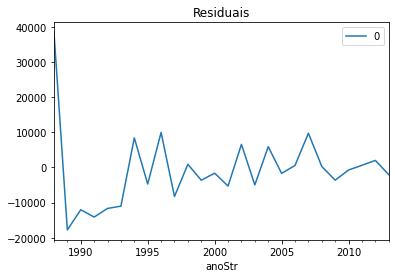

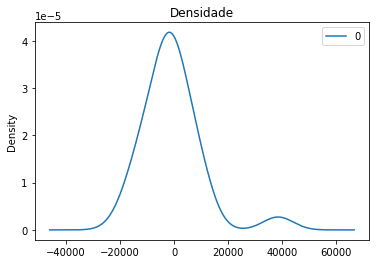

                  0
count     26.000000
mean    -771.359717
std    10783.223563
min   -17775.763126
25%    -5221.855036
50%    -1674.059704
75%     1713.584548
max    38439.486338


In [25]:
# Erros Residuais
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuais')
plt.show()
# density plot of residuals
residuals.plot(kind='kde', title='Densidade')
plt.show()
# summary stats of residuals
print(residuals.describe())

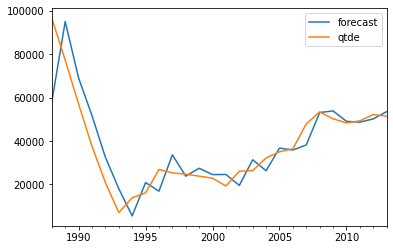

In [26]:
#Comparação entre a série e a predição (forecast)
model_fit.plot_predict(dynamic=False)
plt.show()